Found these CSV files:

0) ../build/outputs/UncoupledNavierStokes2D/outputs_reynolds_20/lift_drag_output.csv
1) ../build/outputs/UncoupledNavierStokes2D/outputs_reynolds_48/lift_drag_output.csv
2) ../build/outputs/UncoupledNavierStokes2D/outputs_reynolds_200/lift_drag_output.csv
3) ../build/outputs/UncoupledNavierStokes2D/outputs_reynolds_10/lift_drag_output.csv
4) ../build/outputs/UncoupledNavierStokes2D/outputs_reynolds_1/lift_drag_output.csv
5) ../build/outputs/UncoupledNavierStokes3D/outputs_reynolds_100/lift_drag_output.csv
6) ../build/outputs/UncoupledNavierStokes3D/outputs_reynolds_200/lift_drag_output.csv

Pick file indices to plot (comma or space separated). E.g. '0' or '0,2':

Plotting: ../build/outputs/UncoupledNavierStokes3D/outputs_reynolds_100/lift_drag_output.csv


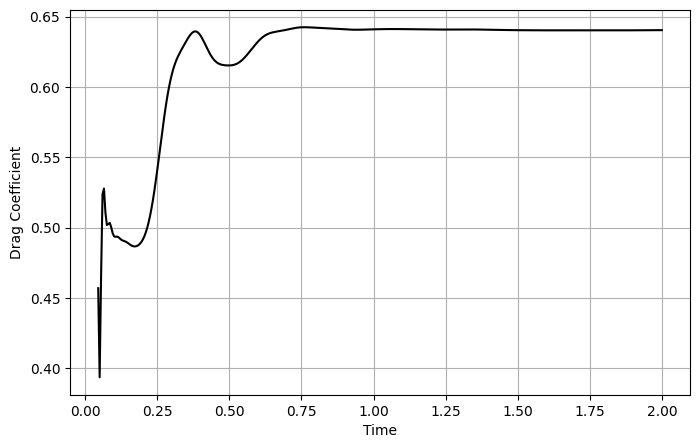

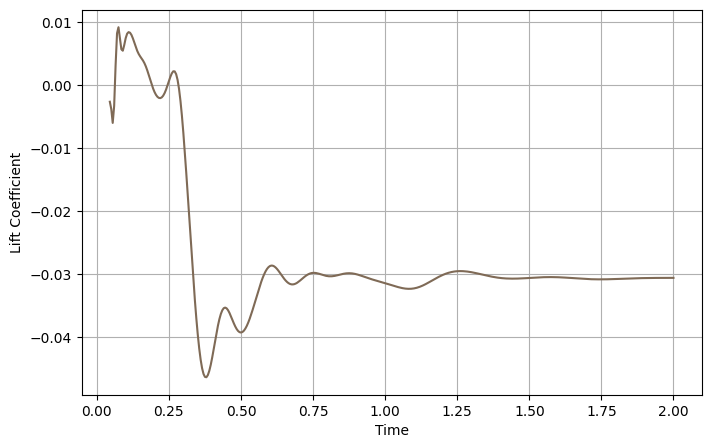

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt

def find_csv_files(directory):
    """
    Recursively find all .csv files in the given directory and its subdirectories.
    Returns a list of full file paths.
    """
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def load_and_plot_csv_separately(file_path):
    """
    Load the CSV file (assuming columns: time, drag_coefficient, lift_coefficient, pressure_drop).
    Remove the first 4 rows (the first 4 timesteps), then create 3 separate plots:
      1) Time vs Drag Coefficient
      2) Time vs Lift Coefficient
      3) Time vs Pressure Drop

    Adjust skiprows/delimiter as needed.
    """
    try:
        # If your CSV has a header row, e.g. "time,drag,lift,pressure", you might do skiprows=1:
        # data = np.loadtxt(file_path, delimiter=',', skiprows=1)
        data = np.loadtxt(file_path, delimiter=',', skiprows=0)
        
        # ---------------------------------------------------
        # REMOVE THE FIRST 4 TIMESTEPS:
        data = data[8:, :]  # slice from the 5th row onward
        # ---------------------------------------------------
        
        if data.shape[1] < 4:
            raise ValueError(
                f"File {file_path} does not have at least 4 columns."
            )

        # After removing the first 4 rows, extract columns
        time = data[:, 0]
        drag_coefficient = data[:, 1]
        lift_coefficient = data[:, 2]
        pressure_drop = data[:, 3]

        # 1) Time vs Drag Coefficient
        plt.figure(figsize=(8, 5))
        plt.plot(time, drag_coefficient, label='Drag Coefficient', color='black')
        plt.xlabel('Time')
        plt.ylabel('Drag Coefficient')
        plt.grid(True)
        plt.show()

        # 2) Time vs Lift Coefficient
        plt.figure(figsize=(8, 5))
        plt.plot(time, lift_coefficient, label='Lift Coefficient', color='#7F6A56')
        plt.xlabel('Time')
        plt.ylabel('Lift Coefficient')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error reading/plotting file {file_path}: {e}")

# -----------------------
# MAIN NOTEBOOK WORKFLOW
# -----------------------

# 1. Specify the directory containing your .csv files
directory = "../build"  # <-- Change this

# 2. Find CSV files recursively
csv_files = find_csv_files(directory)

if not csv_files:
    print(f"No CSV files found in {directory}")
else:
    print("Found these CSV files:\n")
    for i, f in enumerate(csv_files):
        print(f"{i}) {f}")

    # 3. Let the user pick files to plot
    print("\nPick file indices to plot (comma or space separated). E.g. '0' or '0,2':")
    choice = input().strip()

    if choice:
        choice_list = choice.replace(',', ' ').split()
        indices = []
        for c in choice_list:
            try:
                indices.append(int(c))
            except ValueError:
                print(f"Invalid index '{c}', skipping...")

        # 4. For each selected file, plot separately (skipping first 4 timesteps)
        for idx in indices:
            if 0 <= idx < len(csv_files):
                file_path = csv_files[idx]
                print(f"\nPlotting: {file_path}")
                load_and_plot_csv_separately(file_path)
            else:
                print(f"Index {idx} is out of range.")
    else:
        print("No file selected.")
